In [34]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.14.0


In [36]:
# conda install create -n tf tensorflow

In [37]:
import tensorflow as ts
import numpy as np
import matplotlib.pyplot as mpl



In [38]:

from tensorflow import keras
data = keras.datasets.fashion_mnist

In [39]:
(train_images,train_labels), (test_images,test_labels)= data.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images/255.0
test_images = test_images/255.0
# print(train_images[4])


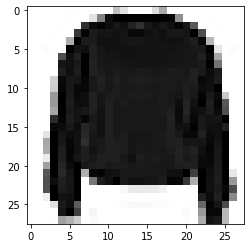

In [22]:
# plt.imshow(train_images[7],cmap= plt.cm.binary )
# plt.show()


In [44]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [48]:
#epoch the number of time model run or takes the takking the different types
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# accuracy tell the percentage of correctness

In [49]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.4919 - acc: 0.8271
Epoch 2/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3783 - acc: 0.8630
Epoch 3/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3375 - acc: 0.8761
Epoch 4/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3158 - acc: 0.8838
Epoch 5/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2958 - acc: 0.8912


In [50]:
# Evaluate the accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


10000/10000 - 0s - loss: 0.3443 - acc: 0.8784

Test accuracy: 0.8784


In [51]:
predictions = model.predict(test_images)
predictions[0]

array([3.6577119e-05, 2.1621648e-08, 5.1997002e-08, 1.9979753e-08,
       7.1820423e-08, 3.2615047e-03, 1.1680280e-06, 3.9716229e-02,
       2.8425120e-07, 9.5698410e-01], dtype=float32)

In [52]:
predictions = model.predict(test_images)

Ankle boot


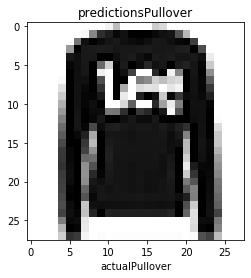

In [62]:
for i in range(2):
    plt.grid(False)
    plt.imshow(test_images[i],cmap = plt.cm.binary)
    plt.xlabel("actual" + class_names[test_labels[i]])
    plt.title("predictions" + class_names[np.argmax(predictions[i])])
print(class_names[np.argmax(predictions[0])])


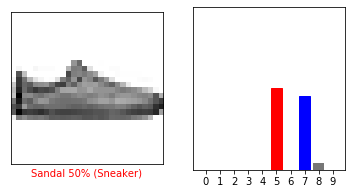

In [67]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


In [65]:

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


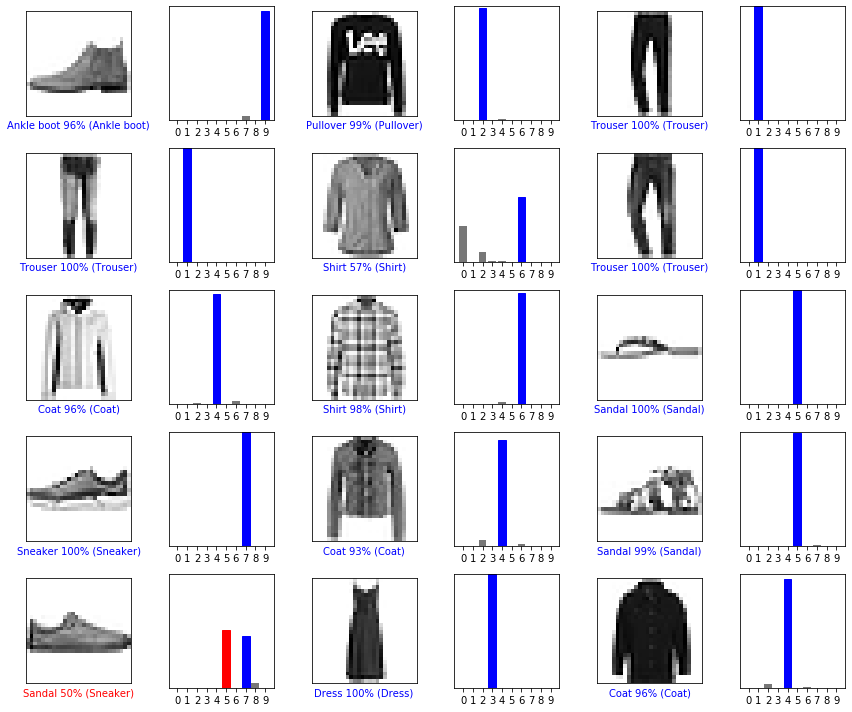

In [66]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
